### 결정트리(Decision Tree)

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [12]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [13]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)

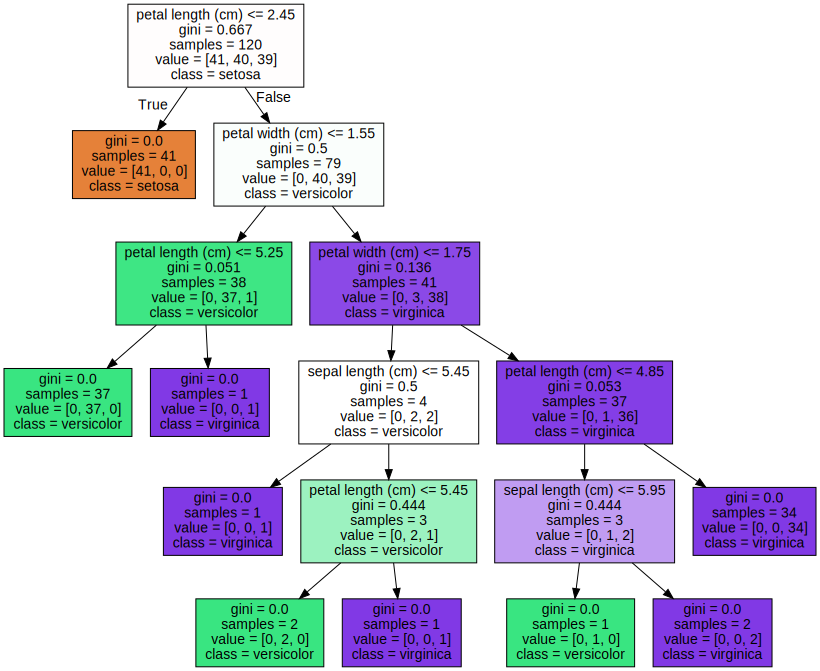

In [15]:
import graphviz

with open('tree.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

[Text(0.3076923076923077, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.38461538461538464, 0.75, 'X[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[2] <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.5833333333333334, 'X[3] <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(0.38461538461538464, 0.4166666666666667, 'X[0] <= 5.45\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.384

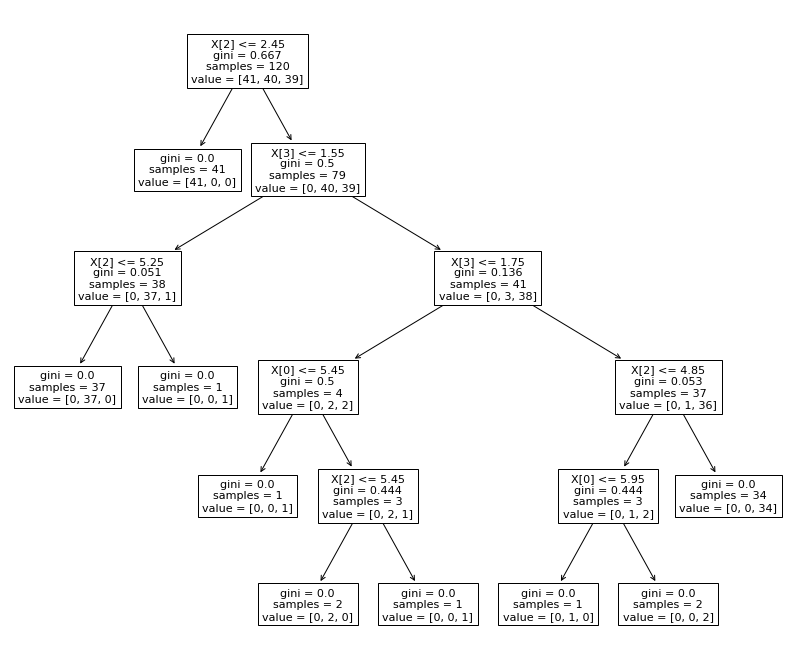

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plot_tree(dtc)

### 제약조건
 - max_depth =3

In [18]:
dtc2 = DecisionTreeClassifier(max_depth=3)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

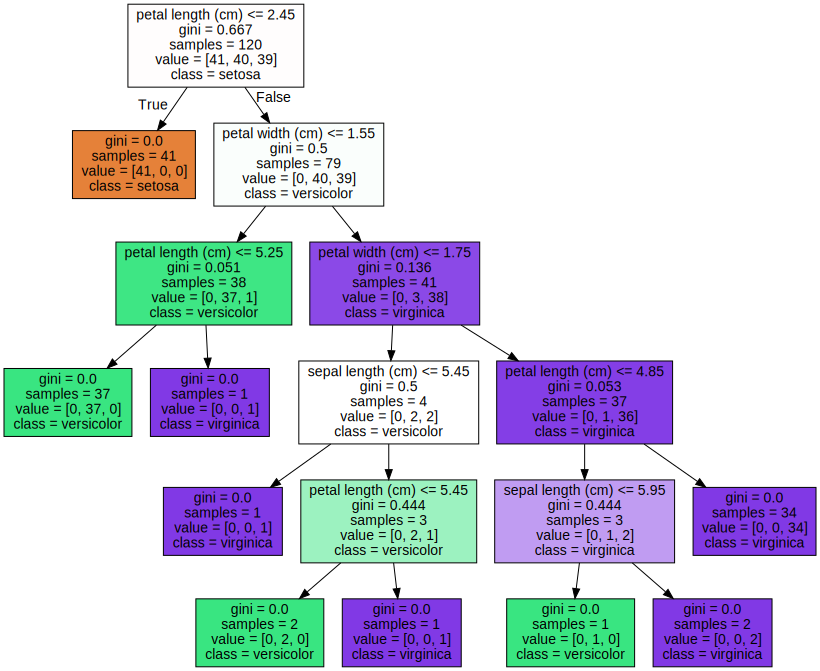

In [21]:
export_graphviz(
    dtc, out_file='tree2.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)
with open('tree2.dot') as file:
    dot_graph2 = file.read()
graphviz.Source(dot_graph2)

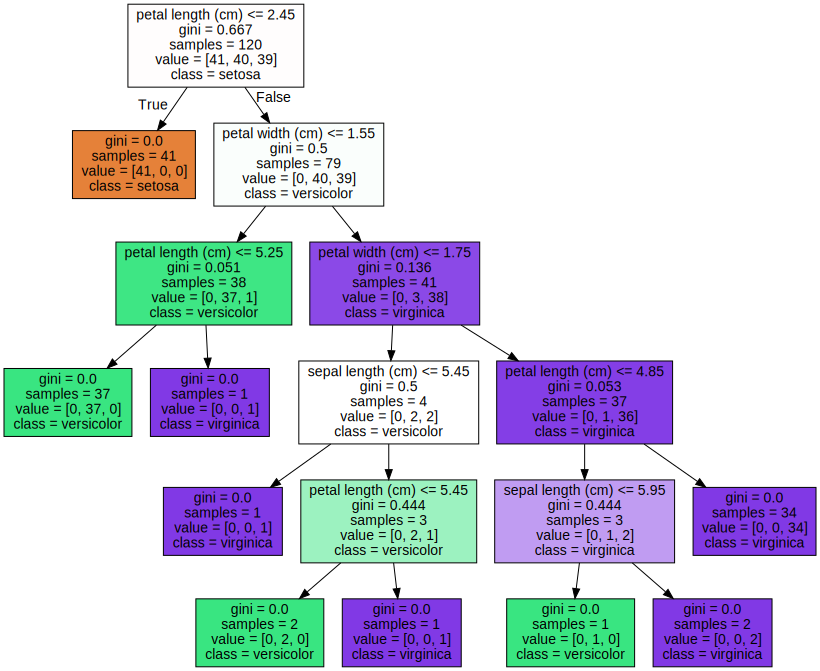

In [22]:
dtc3 = DecisionTreeClassifier(max_depth=4, random_state=143)
dtc3.fit(X_train, y_train)
export_graphviz(
    dtc, out_file='tree3.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)
with open('tree3.dot') as file:
    dot_graph3 = file.read()
graphviz.Source(dot_graph3)

 - min_samples_leaf = 2

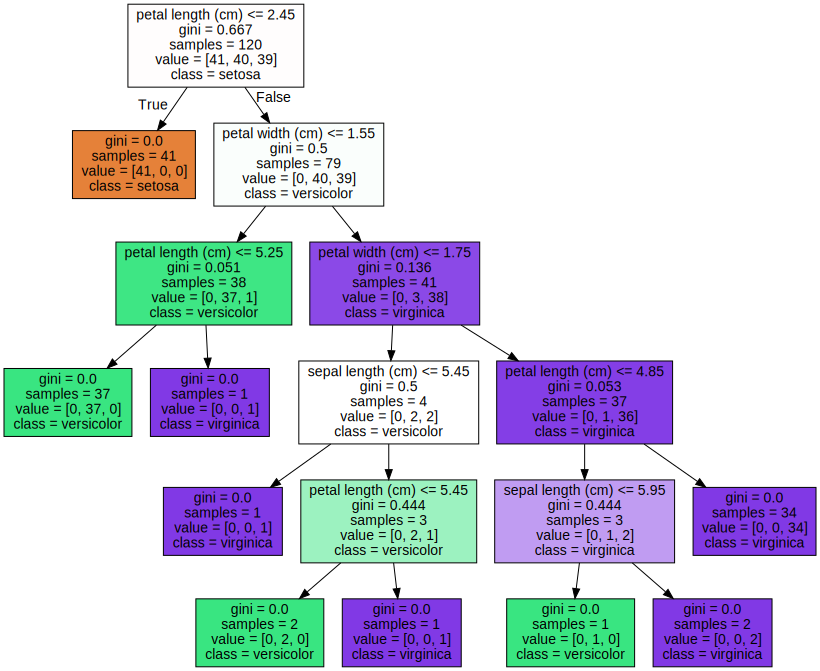

In [24]:
dtc4 = DecisionTreeClassifier(min_samples_leaf = 2, random_state=1444)
dtc4.fit(X_train, y_train)
export_graphviz(
    dtc, out_file='tree4.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)
with open('tree4.dot') as file:
    dot_graph4 = file.read()
graphviz.Source(dot_graph4)

- 모델 비교

In [25]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test), dtc4.score(X_test, y_test), 

(0.9333333333333333,
 0.8666666666666667,
 0.8666666666666667,
 0.9333333333333333)

### 학습된 모델이 제공하는 정보
 - Feature importance

In [26]:
dtc.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [27]:
dtc2.feature_importances_

array([0.        , 0.        , 0.04173289, 0.95826711])

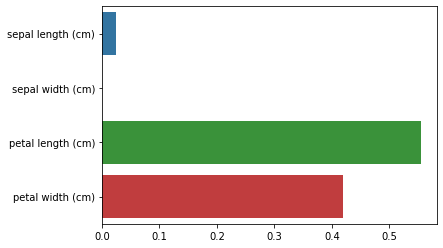

In [28]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()